In [45]:
#A) number of rows in training and test sets

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file1 = open("test.csv")
file2= open("train.csv")
file3=open("gender_submission.csv")
numline1 = len(file1.readlines())
numline2 = len(file2.readlines())
print ("number of rows in test.csv =",numline1)
print ("number of rows in train.csv =",numline2)

number of rows in test.csv = 419
number of rows in train.csv = 892


In [46]:
#B) display the structure of the dataset along with the datatypes of the fields
import pandas as pd
df = pd.read_csv('test.csv')
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('gender_submission.csv')
print("Data set and Data Type of test.csv")
print("  ")
print(df.dtypes)
print("----------------------------------")
print("Data set and Data Type of train.csv")
print("  ")
print(df1.dtypes)
print("----------------------------------")
print("Data set and Data Type of gender_submission.csv")
print("  ")
print(df2.dtypes)


Data set and Data Type of test.csv
  
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
----------------------------------
Data set and Data Type of train.csv
  
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
----------------------------------
Data set and Data Type of gender_submission.csv
  
PassengerId    int64
Survived       int64
dtype: object


# Data Cleaning:

In [47]:
#1. Analyse the data and identify which columns are not relevant for survivor prediction task. Drop those 
#columns from the dataframes. 

file2 = pd.read_csv('train.csv')
print("Original 'train.csv' CSV Data: \n")
file2.drop(['Name','Ticket','Survived',],inplace=True, axis=1)

print("\nCSV Data after deleting the columns:\n")
print(file2)





Original 'train.csv' CSV Data: 


CSV Data after deleting the columns:

     PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0              1       3    male  22.0      1      0   7.2500   NaN        S
1              2       1  female  38.0      1      0  71.2833   C85        C
2              3       3  female  26.0      0      0   7.9250   NaN        S
3              4       1  female  35.0      1      0  53.1000  C123        S
4              5       3    male  35.0      0      0   8.0500   NaN        S
..           ...     ...     ...   ...    ...    ...      ...   ...      ...
886          887       2    male  27.0      0      0  13.0000   NaN        S
887          888       1  female  19.0      0      0  30.0000   B42        S
888          889       3  female   NaN      1      2  23.4500   NaN        S
889          890       1    male  26.0      0      0  30.0000  C148        C
890          891       3    male  32.0      0      0   7.7500   NaN        Q

[89

In [48]:
#2. Check how many columns have missing values in them (NA) and how many have NaN values. Logically 
#impute the dataset.

print(df.isnull().sum())
print("--------------------------------")
print(df1.isnull().sum())
print("--------------------------------")
print(df2.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
--------------------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------------------
PassengerId    0
Survived       0
dtype: int64


In [49]:
#3. Identify any categorical valued columns (non-numeric) and convert them to numeric.
numeric= {"Sex": {"female": 1, "male": 2}}
df1.replace(numeric).dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Exploratory Analysis (On training set):

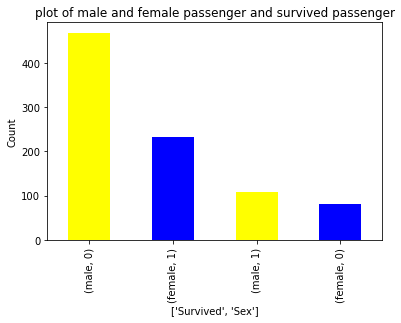

In [80]:
#1. Show how many passengers were male and female and plot using matplotlib. On the same plot depict 
#the people who survived and who died. Make accurate axis and legend. Save the plot in a png file.
count=df1['Sex'].value_counts()[0]
count1=df1[['Sex','Survived']].value_counts()
count1.plot(kind='bar',color=['yellow','blue'])
plt.title("plot of male and female passenger and survived passenger")
plt.xlabel(['Survived','Sex'])
plt.ylabel('Count')
plt.savefig('graph1 plot of male and female passenger and survived passenger.png')
plt.show()

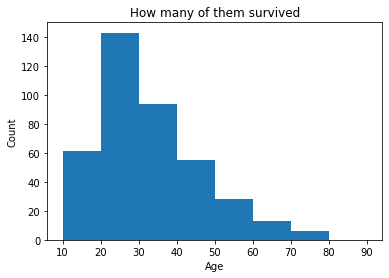

In [54]:
"""" #2. Show the histogram of the count of passengers who died (according to their age). Age ranges should 
#be <10, 10 to <20, 20 to <30 and so on. 
#How many minor children died and how many of them survived (<16 years). Create a separate plot for 
the passengers who survived."""

df1.query('Survived ==0 and Age<=16').count()
survived=df1.query('Survived==0')
age=survived['Age']
plt.hist(age,bins=[10,20,30,40,50,60,70,80,90])
plt.title("How many of them survived")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

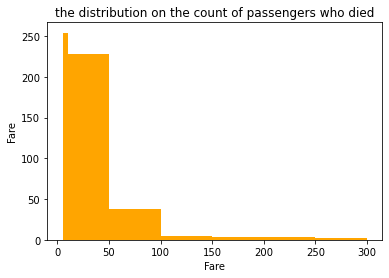

In [55]:
#.3Show the distribution on the count of passengers who died (according to the fare they paid). Choose 
#fare ranges such that the mean lies in the middle range. 
#Give the percentage of passengers who survived as had paid more than $100. Justify if there was any 
#bias in the rescue operation towards the rich (Yes/No/not enough evidence). 
paid=df1.query('Survived!=1')
paid
plt.hist(paid['Fare'],bins=[5,10,50,100,150,200,250,300],color='orange')
plt.title("the distribution on the count of passengers who died")
plt.xlabel('Fare')
plt.ylabel('Fare')
plt.show()


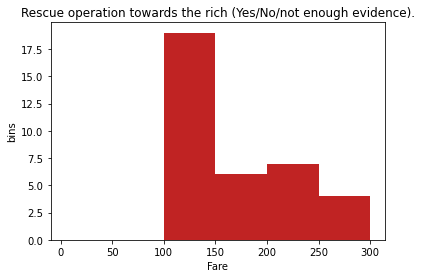

In [57]:
paid=df1.query('Survived==1 and Fare>=100')
df1
plt.hist(paid['Fare'],bins=[5,10,50,100,150,200,250,300],color='#C02323')
plt.title("Rescue operation towards the rich (Yes/No/not enough evidence).")
plt.xlabel('Fare')
plt.ylabel('bins')
plt.show()



In [59]:
F100=df1.query('Fare>=100')
PID=F100['PassengerId'].count()
PS=paid['PassengerId'].count()
percentage=(PS/PID)*100
print("Number of Passenger who survived and have fare>=100 = ", PS)
print(" Number of Passenger Id who have paid fare>=100 = ",PID)
print("Percentage of passenger survived = ",percentage,"%")

Number of Passenger who survived and have fare>=100 =  39
 Number of Passenger Id who have paid fare>=100 =  53
Percentage of passenger survived =  73.58490566037736 %


             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


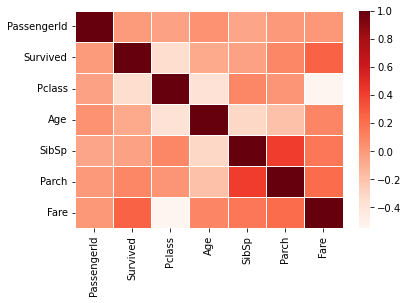

In [71]:
#4. Plot graphs showing correlation between different pairs of attributes. Infer if there is any significant 
#correlation between survivors and any specific feature

correlation=df1.corr()
print(correlation)
sns.heatmap(correlation,linewidth = 1 , cmap = 'Reds')
plt.show()

In [79]:
#Find number of Passengers who are Married.
count=df1['Name'].tolist()
l=0
for i in range(len(count)):
    for j in range(i,len(count[i])):
        if('Mrs.','Mr' in count[j] ):
            l=l+1
print(c)

520
